In [15]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
file_path = r"C:\Users\gaura\OneDrive\Desktop\SI\hypertension datset\Hypertension-risk-model-main.csv"
df = pd.read_csv(file_path)

In [17]:
df_clean = df.dropna()


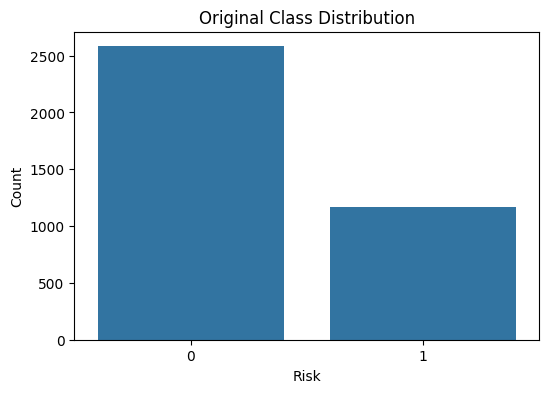

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='Risk')
plt.title("Original Class Distribution")
plt.xlabel("Risk")
plt.ylabel("Count")
plt.show()


In [19]:
X = df_clean.drop("Risk", axis=1)
y = df_clean["Risk"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\gaura\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority),
    random_state=42
)

In [11]:
df_balanced = pd.concat([df_majority_downsampled, df_minority])

In [12]:
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [13]:
print("\nAfter balancing:")
print(df_balanced['Risk'].value_counts())



After balancing:
Risk
0    1170
1    1170
Name: count, dtype: int64


In [14]:
df_balanced.to_csv("balanced_cleaned_dataset.csv", index=False)
print("\nBalanced and cleaned dataset saved as 'balanced_cleaned_dataset.csv'")


Balanced and cleaned dataset saved as 'balanced_cleaned_dataset.csv'
